# Introduction to PyCBC Inference 3: Results files and plotting
### Collin Capano

In this tutorial, we take a closer look at the output files, including how to load samples from them. We then illustrate more advanced options in `pycbc_inference_plot_posterior`, and show how to create a posterior file. We will use an already complete results file.

### Prerequisites

In [1]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [45]:
from __future__ import print_function
import os
import matplotlib
%matplotlib notebook
from matplotlib import pyplot

from IPython.display import Image

We will download a GW150914 result file from a fully completed analysis, from [here](https://www.atlas.aei.uni-hannover.de/~cdcapano/projects/pycbc_inference/workshop-may2019/).

In [4]:
if not os.path.exists('gw150914_example_results.hdf'):
    !wget https://www.atlas.aei.uni-hannover.de/~cdcapano/projects/pycbc_inference/workshop-may2019/gw150914_example_results.hdf

## The results file

In [5]:
from pycbc.inference.io import loadfile

In [6]:
fp = loadfile('gw150914_example_results.hdf', 'r')

In [7]:
fp.keys()

[u'data', u'sampler_info', u'samples']

In [8]:
fp.attrs.items()

[(u'approximant', 'IMRPhenomPv2'),
 (u'cmd',
  array(['/work/cdcapano/virtualenv/test_thinning/bin/pycbc_inference --verbose --seed 39392 --instruments H1 L1 --gps-start-time 1126259452 --gps-end-time 1126259468 --channel-name H1:LOSC-STRAIN L1:LOSC-STRAIN --frame-files H1:H-H1_LOSC_4_V2-1126257414-4096.gwf L1:L-L1_LOSC_4_V2-1126257414-4096.gwf --strain-high-pass 15 --pad-data 8 --psd-estimation H1:median L1:median --psd-start-time 1126258950 --psd-end-time 1126259974 --psd-segment-length 16 --psd-segment-stride 8 --psd-inverse-length 4 --sample-rate 2048 --low-frequency-cutoff 20 --config-file inference.ini --output-file inference.hdf --processing-scheme cpu --nprocesses 28 --force'],
        dtype='|S636')),
 (u'dlog_evidence', 19.26937468041433),
 (u'effective_nsamples', 1200),
 (u'f_lower', 18.0),
 (u'f_ref', 20.0),
 (u'filetype', 'emcee_pt_file'),
 (u'log_evidence', -497316.219285716),
 (u'low_frequency_cutoff', 20.0),
 (u'model', 'gaussian_noise'),
 (u'resume_points', array([0]))

In [9]:
fp['sampler_info'].keys()

[u'acceptance_fraction', u'acls', u'burn_in_tests', u'random_state']

In [10]:
fp['sampler_info'].attrs.items()

[(u'acl', 37.0),
 (u'betas',
  array([1.00000000e+00, 5.44146615e-01, 2.96095538e-01, 1.61119385e-01,
         8.76725679e-02, 4.77067310e-02, 2.59594562e-02, 1.41257502e-02,
         7.68647916e-03, 4.18257162e-03, 2.27593219e-03, 1.23844079e-03,
         6.73893366e-04, 3.66696794e-04, 1.99536819e-04, 1.08577285e-04,
         5.90819619e-05, 3.21492496e-05, 1.74939053e-05, 9.51924936e-06])),
 (u'burn_in_iteration', 1000),
 (u'burn_in_test', 'nacl'),
 (u'is_burned_in', True),
 (u'niterations', 2000),
 (u'ntemps', 20),
 (u'nwalkers', 200)]

In [30]:
print(fp['samples'].keys())

[u'coa_phase', u'dec', u'distance', u'inclination', u'logjacobian', u'loglikelihood', u'logprior', u'mass1', u'mass2', u'polarization', u'ra', u'spin1_a', u'spin1_azimuthal', u'spin1_polar', u'spin2_a', u'spin2_azimuthal', u'spin2_polar', u'tc']


In [12]:
fp['samples'].attrs.items()

[(u'H1_lognl', -82132.73680253043),
 (u'L1_lognl', -415379.0622201938),
 (u'lognl', -497511.7990227242)]

In [13]:
print(fp['samples/mass1'].shape)

(20, 200, 500)


## Load samples

In [20]:
samples = fp.read_samples(fp['samples'].keys(), temps=0)

In [26]:
type(samples)

pycbc.io.record.FieldArray

In [21]:
print(samples.shape)

(1400,)


In [28]:
print(samples.fieldnames)

('distance', 'mass1', 'mass2', 'spin2_polar', 'logprior', 'spin1_polar', 'logjacobian', 'spin2_azimuthal', 'polarization', 'spin2_a', 'spin1_azimuthal', 'ra', 'spin1_a', 'coa_phase', 'dec', 'loglikelihood', 'tc', 'inclination')


In [22]:
samples['mass1']

array([24.2805777 , 24.30974089, 24.52648712, ..., 53.94001275,
       47.70850241, 47.69056716])

### Plot `mass1` and `mass2`

In [38]:
mass1 = samples['mass1']
mass2 = samples['mass2']

<IPython.core.display.Javascript object>


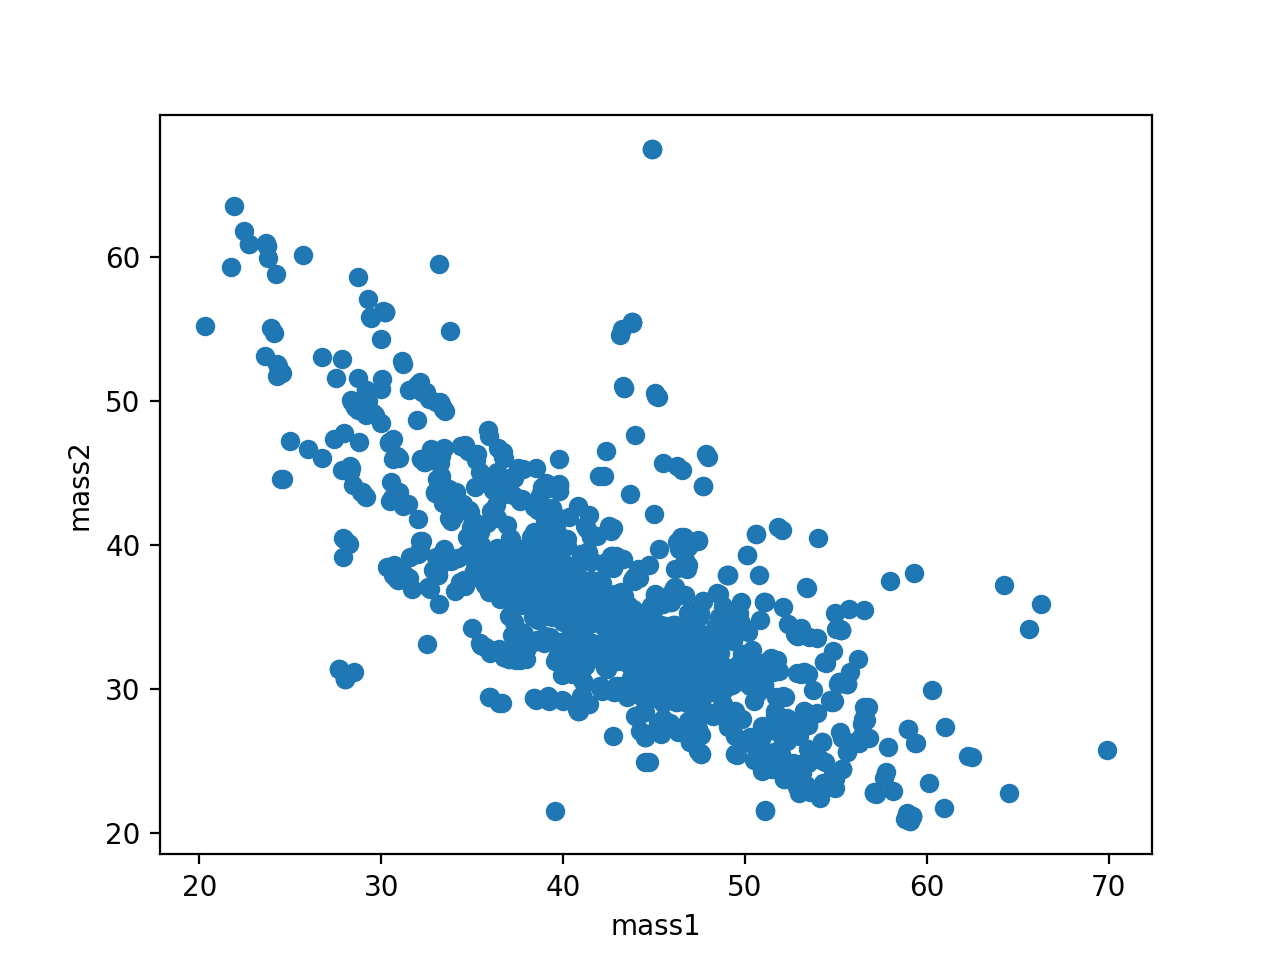

In [39]:
fig, ax = pyplot.subplots()
ax.scatter(mass1, mass2)
ax.set_xlabel('mass1')
ax.set_ylabel('mass2')
fig.show()

In [40]:
(mass1 >= mass2).all()

False

## Field Arrays

In [34]:
from pycbc import conversions

In [36]:
mass1 = conversions.primary_mass(samples['mass1'], samples['mass2'])
mass2 = conversions.secondary_mass(samples['mass1'], samples['mass2'])

In [37]:
(mass1 >= mass2).all()

True

In [41]:
mass1 = samples['primary_mass(mass1, mass2)']
mass2 = samples['secondary_mass(mass1, mass2)']

<IPython.core.display.Javascript object>


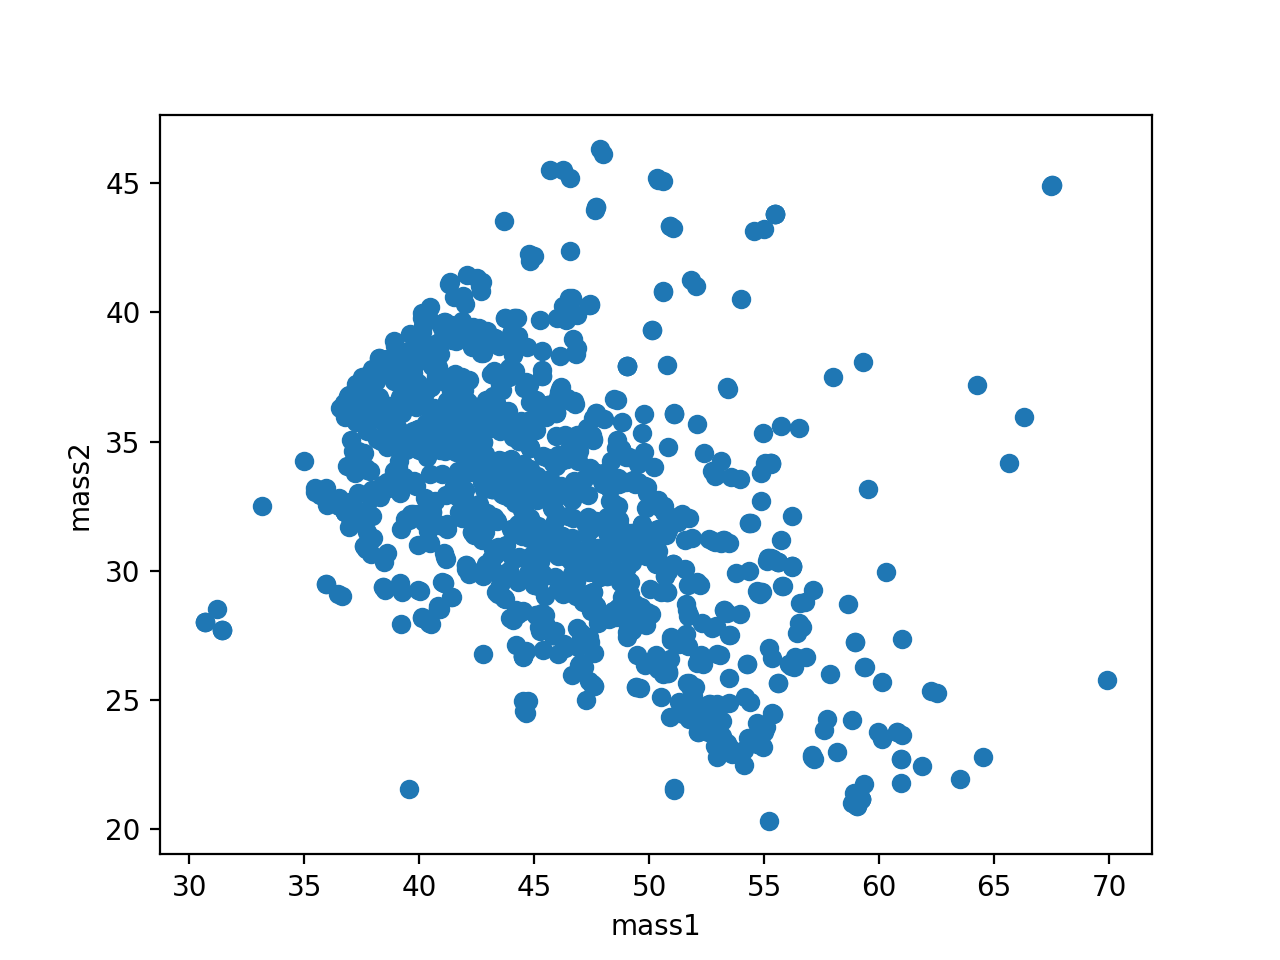

In [42]:
fig, ax = pyplot.subplots()
ax.scatter(mass1, mass2)
ax.set_xlabel('mass1')
ax.set_ylabel('mass2')
fig.show()

## The `--parameters` option

In [48]:
!pycbc_inference_plot_posterior \
    --input-file gw150914_example_results.hdf \
    --output-file mass1_mass2.png \
    --parameters 'primary_mass(mass1, mass2):mass1' 'secondary_mass(mass1, mass2):mass2' \
    --plot-scatter \
    --plot-contours \
    --plot-marginal \
    --z-arg snr

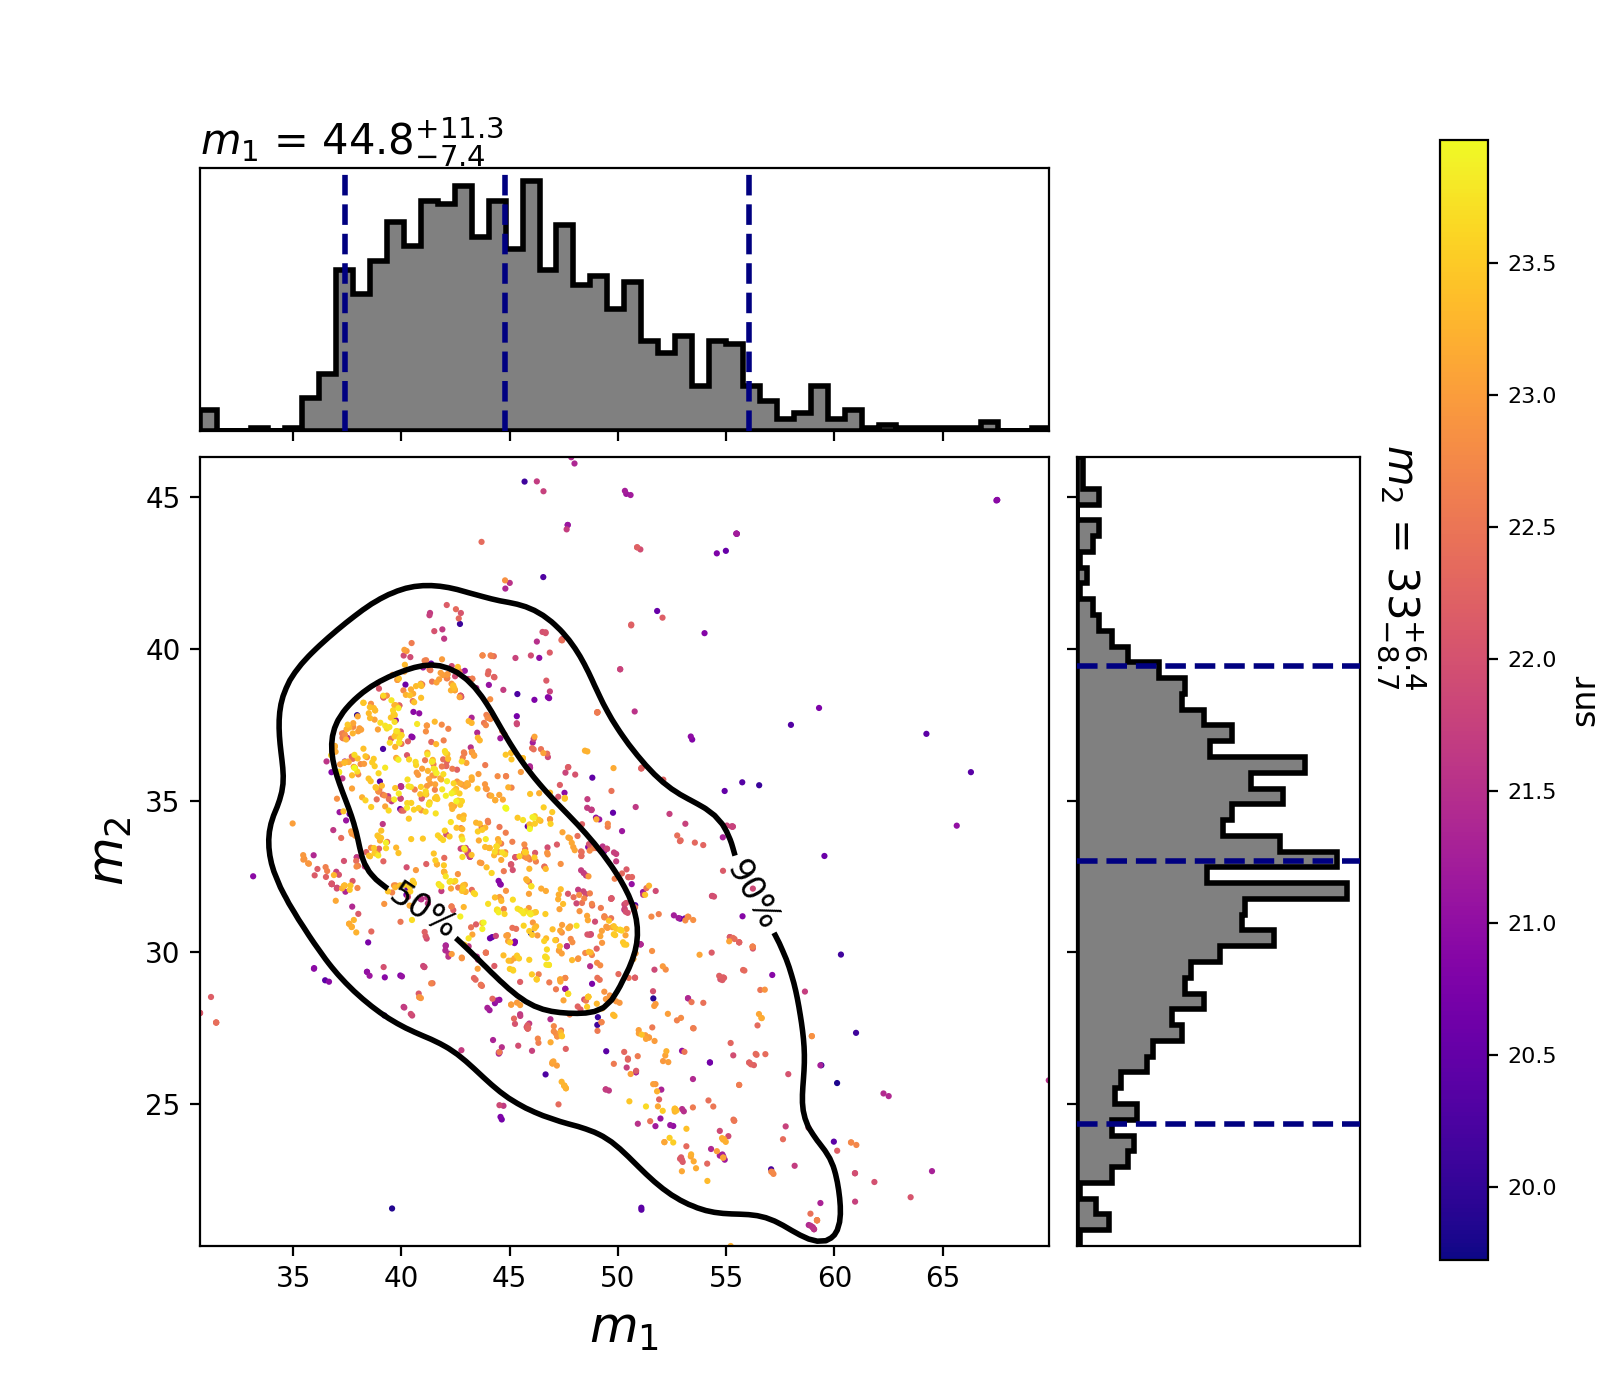

In [52]:
Image(filename='mass1_mass2.png', width=640, height=480)

In [51]:
!pycbc_inference_plot_posterior --input-file gw150914_example_results.hdf --file-help


Parameters available with this (these) input file(s):

coa_phase dec distance inclination logjacobian loglikelihood logprior
mass1 mass2 polarization ra spin1_a spin1_azimuthal spin1_polar
spin2_a spin2_azimuthal spin2_polar tc

Available pycbc functions (see http://pycbc.org/pycbc/latest/html for
more details):

cartesian_to_spherical, cartesian_to_spherical_azimuthal,
cartesian_to_spherical_polar, cartesian_to_spherical_rho, chi_a,
chi_eff, chi_eff_from_spherical, chi_p, chi_p_from_spherical,
chi_p_from_xi1_xi2, chi_perp_from_mass1_mass2_xi2,
chi_perp_from_spinx_spiny, chirp_distance,
cosmological_quantity_from_redshift, det_tc,
distance_from_comoving_volume, dquadmon_from_lambda,
eta_from_mass1_mass2, eta_from_q, eta_from_tau0_tau3,
final_mass_from_f0_tau, final_mass_from_initial,
final_spin_from_f0_tau, final_spin_from_initial,
freq_from_final_mass_spin, invq_from_mass1_mass2,
lambda_from_mass_tov_file, lambda_tilde, mass1_from_mass2_eta,
mass1_from_mchirp_eta, mass1_from_mchirp_q

### Challenge:
Make a posterior plot of chirp mass ("mchirp") vs eta.

## Posterior files

In [56]:
!pycbc_inference_extract_samples --verbose \
    --input-file gw150914_example_results.hdf \
    --output-file mass_posterior.hdf \
    --parameters \
        'primary_mass(mass1, mass2):mass1' \
        'secondary_mass(mass1, mass2):mass2' \
        'mchirp_from_mass1_mass2(mass1, mass2):mchirp' \
        'eta_from_mass1_mass2(mass1, mass2):eta' \
        loglikelihood \
    --skip-groups data sampler_info

2019-05-13 18:07:41,326 Reading input file gw150914_example_results.hdf
2019-05-13 18:07:41,327 Loading samples
2019-05-13 18:07:41,341 Using 1400 samples
2019-05-13 18:07:41,355 Copying info


In [57]:
fp = loadfile('mass_posterior.hdf', 'r')

In [58]:
fp.keys()

[u'samples']

In [59]:
fp['samples'].keys()

[u'eta', u'loglikelihood', u'mass1', u'mass2', u'mchirp']

In [60]:
fp['samples']['mchirp'].shape

(1400,)

In [71]:
!ls -lh gw150914_example_results.hdf mass_posterior.hdf

-rw-r--r--  1 cdcapano  staff   292M May 13 16:14 gw150914_example_results.hdf
-rw-r--r--  1 cdcapano  staff    75K May 13 18:07 mass_posterior.hdf


In [61]:
fp.attrs.items()

[(u'approximant', 'IMRPhenomPv2'),
 (u'cmd',
  array(['/work/cdcapano/virtualenv/test_thinning/bin/pycbc_inference --verbose --seed 39392 --instruments H1 L1 --gps-start-time 1126259452 --gps-end-time 1126259468 --channel-name H1:LOSC-STRAIN L1:LOSC-STRAIN --frame-files H1:H-H1_LOSC_4_V2-1126257414-4096.gwf L1:L-L1_LOSC_4_V2-1126257414-4096.gwf --strain-high-pass 15 --pad-data 8 --psd-estimation H1:median L1:median --psd-start-time 1126258950 --psd-end-time 1126259974 --psd-segment-length 16 --psd-segment-stride 8 --psd-inverse-length 4 --sample-rate 2048 --low-frequency-cutoff 20 --config-file inference.ini --output-file inference.hdf --processing-scheme cpu --nprocesses 28 --force'],
        dtype='|S636')),
 (u'dlog_evidence', 19.26937468041433),
 (u'effective_nsamples', 1200),
 (u'f_lower', 18.0),
 (u'f_ref', 20.0),
 (u'filetype', 'posterior_file'),
 (u'log_evidence', -497316.219285716),
 (u'low_frequency_cutoff', 20.0),
 (u'model', 'gaussian_noise'),
 (u'remapped_params', array([[

In [63]:
posterior_samples = fp.read_samples(['mass1', 'mass2'])
mass1 = posterior_samples['mass1']
mass2 = posterior_samples['mass2']

In [64]:
(mass1 >= mass2).all()

True

In [69]:
!pycbc_inference_plot_posterior \
    --input-file mass_posterior.hdf \
    --output-file posterior_mass1_mass2.png \
    --parameters mass1 mass2 mchirp eta \
    --plot-scatter \
    --plot-contours \
    --plot-marginal \
    --z-arg snr

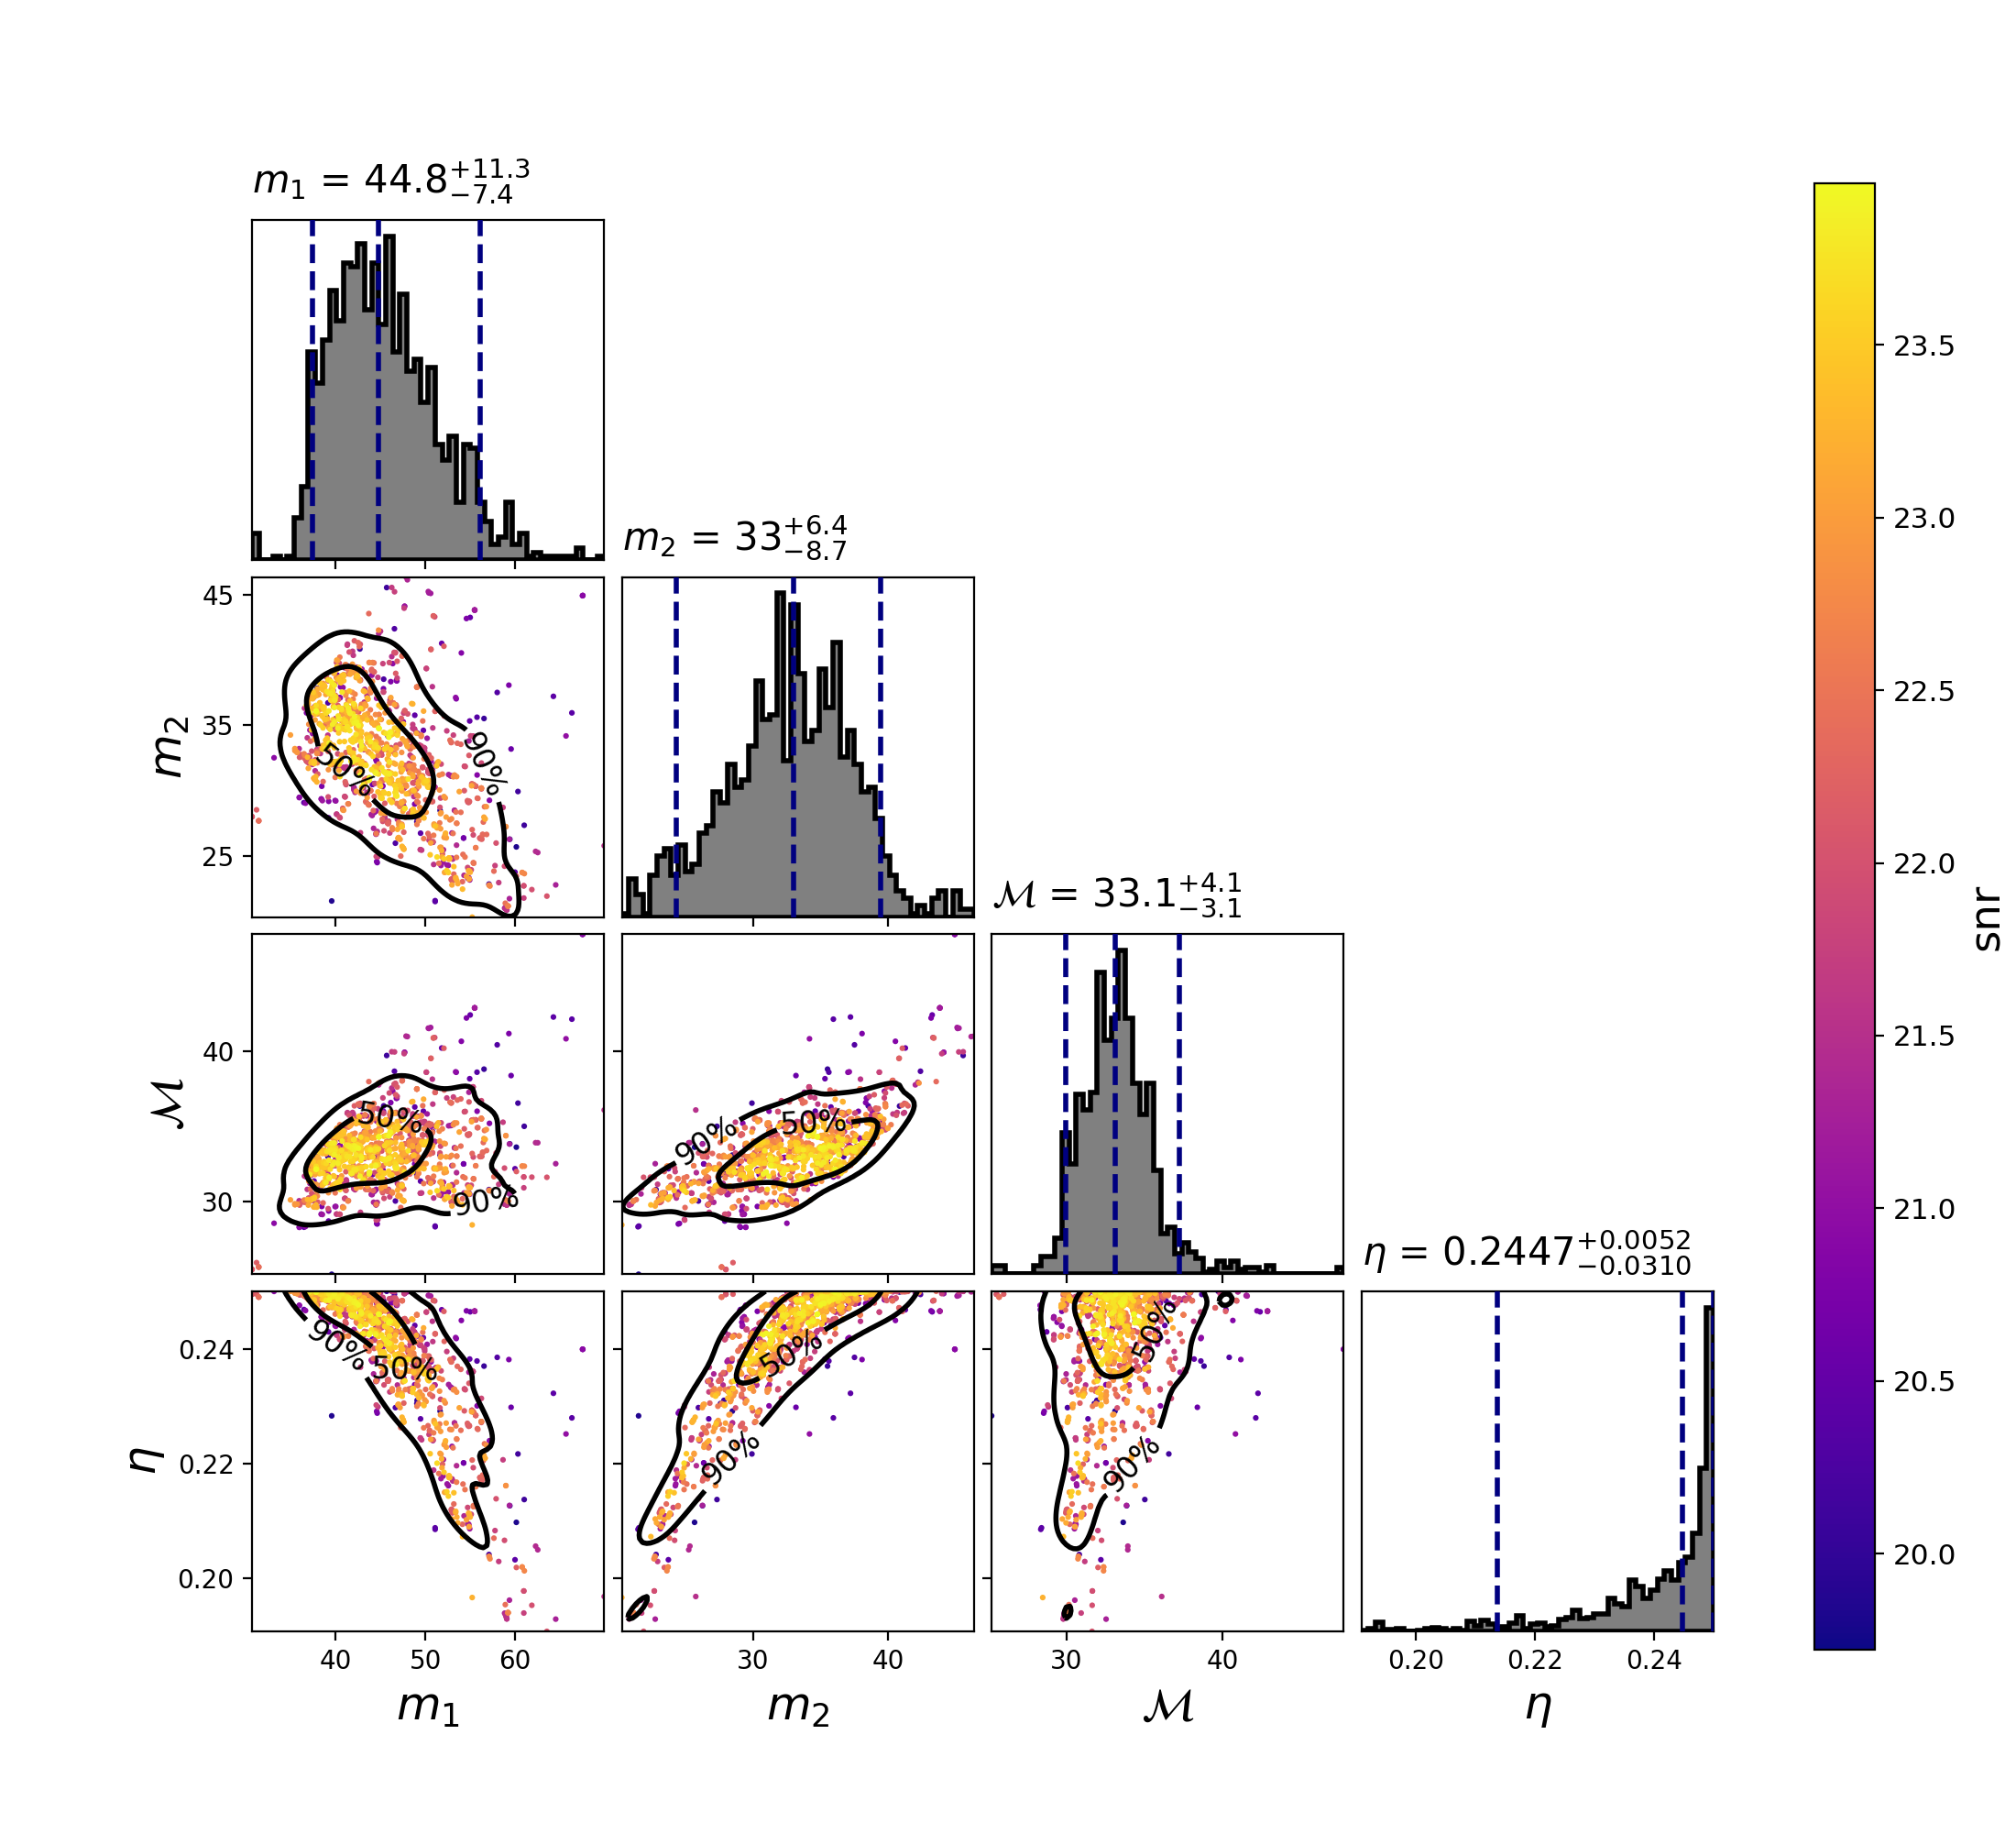

In [70]:
Image(filename='posterior_mass1_mass2.png', width=640, height=480)